## Data Framework

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl

from datetime import datetime
from random import randint

import geopandas as gpd

### Purpose of Study

The following study aims to analyse the nature of Accident & Emergency Demands in Hospitals in Scotland

### Sourcing Data

Use trusted sources of Secondary data. Here, we will be using published data from "Public Health Scotland" for Demands in Emergency Centres. 


Source: https://www.opendata.nhs.scot/

In [2]:
url_demographics= 'https://www.opendata.nhs.scot/dataset/997acaa5-afe0-49d9-b333-dcf84584603d/resource/6abbf8e4-e4e0-4a56-a7b9-f7c7b4171ff3/download/opendata_monthly_ae_demographics_202409.csv'

In [3]:
url_when= 'https://www.opendata.nhs.scot/dataset/997acaa5-afe0-49d9-b333-dcf84584603d/resource/022c3b27-6a58-48dc-8038-8f1f93bb0e78/download/opendata_monthly_ae_when_202409.csv'

In [22]:
df_demo = pd.read_csv(url_demographics)
df_demo.head()

,Month,Country,HBT,DepartmentType,Age,AgeQF,Sex,SexQF,Deprivation,DeprivationQF,NumberOfAttendances
0,201801,S92000003,S08000015,Emergency Department,18-24,NaN,Female,NaN,1.0,NaN,158
1,201801,S92000003,S08000015,Emergency Department,18-24,NaN,Female,NaN,2.0,NaN,112
2,201801,S92000003,S08000015,Emergency Department,18-24,NaN,Female,NaN,3.0,NaN,50
3,201801,S92000003,S08000015,Emergency Department,18-24,NaN,Female,NaN,4.0,NaN,39
4,201801,S92000003,S08000015,Emergency Department,18-24,NaN,Female,NaN,5.0,NaN,27


In [5]:
df_when = pd.read_csv(url_when)
df_when.head()

,Month,Country,HBT,TreatmentLocation,DepartmentType,Day,Week,Hour,InOut,NumberOfAttendances
0,201801,S92000003,S08000015,A111H,Emergency Department,Friday,Weekday,00:00 to 00:59,Out of Hours,20
1,201801,S92000003,S08000015,A111H,Emergency Department,Friday,Weekday,01:00 to 01:59,Out of Hours,14
2,201801,S92000003,S08000015,A111H,Emergency Department,Friday,Weekday,02:00 to 02:59,Out of Hours,6
3,201801,S92000003,S08000015,A111H,Emergency Department,Friday,Weekday,03:00 to 03:59,Out of Hours,5
4,201801,S92000003,S08000015,A111H,Emergency Department,Friday,Weekday,04:00 to 04:59,Out of Hours,5


### Data Filtering/Sorting/Searching

Before conducting any analysis, it is a good practise to look through the structure of the Data to check for any anomalies, missing values and inconsistencies. 

In [6]:
df_demo.shape

(111438, 11)

In [7]:
df_demo.isna().sum()

Month                       0
Country                     0
HBT                         0
DepartmentType              0
Age                      1722
AgeQF                  109716
Sex                      1722
SexQF                  109716
Deprivation             17267
DeprivationQF           94171
NumberOfAttendances         0
dtype: int64

In [8]:
df_demo.describe()

,Month,Deprivation,NumberOfAttendances
count,111438.000000,94171.000000,111438.000000
mean,202101.114252,3.008463,89.251458
std,195.975740,1.374900,152.021690
min,201801.000000,1.000000,1.000000
25%,201909.000000,2.000000,12.000000
50%,202106.000000,3.000000,41.000000
75%,202302.000000,4.000000,105.000000
max,202409.000000,5.000000,2405.000000


### Exploratory Analysis (EDA)

The month statistics data has information about the Day, Hours and Number of attendances information. This can be useful in answering the following aspects of the nature of the A&E demand-

- How does demand change with each day?
- Do Specific hours of the day have higher demand?

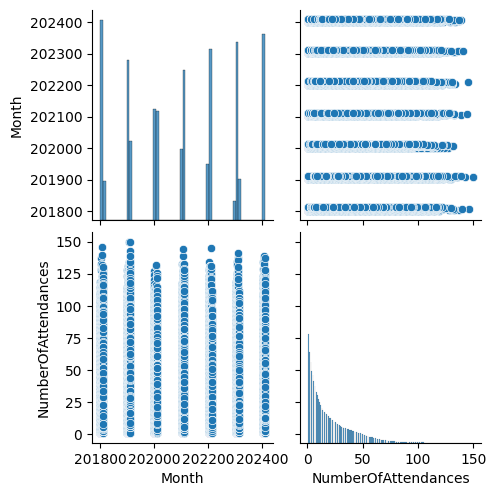

In [9]:
sns.pairplot(df_when)

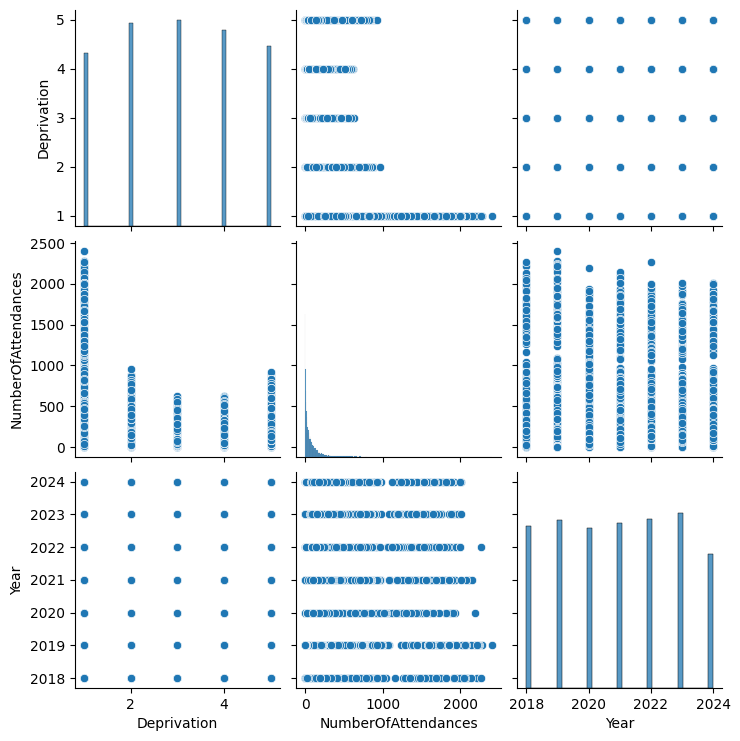

In [20]:
sns.pairplot(df_demo)

<Axes: xlabel='Day', ylabel='NumberOfAttendances'>

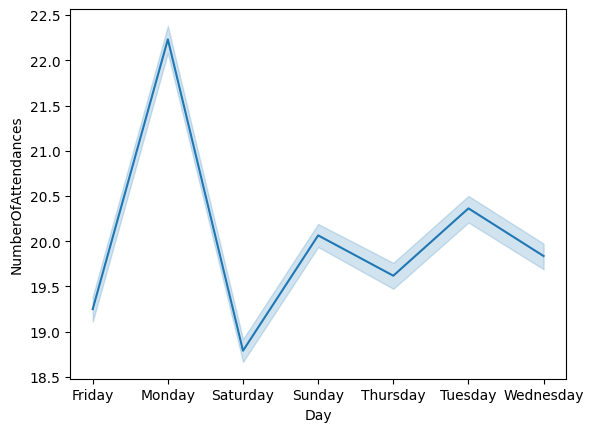

In [10]:
sns.lineplot(df_when,x="Day",y="NumberOfAttendances")

<Axes: xlabel='Day', ylabel='NumberOfAttendances'>

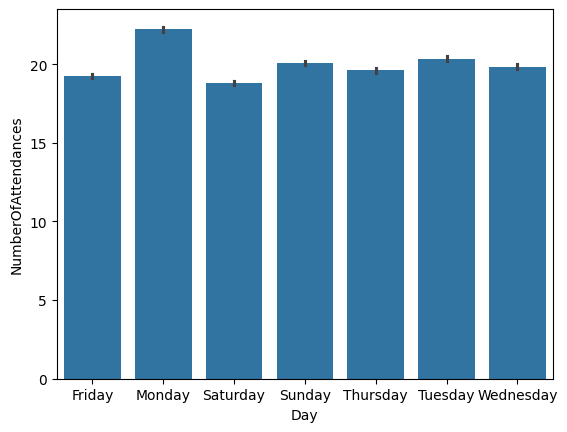

In [11]:
sns.barplot(df_when,x="Day",y="NumberOfAttendances")

In [12]:
#sns.scatterplot(df_when,x="Month", y="NumberOfAttendances", hue="InOut")

<Axes: xlabel='Day', ylabel='NumberOfAttendances'>

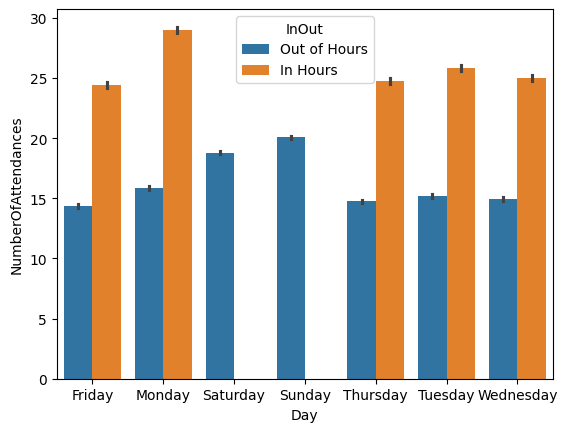

In [13]:
sns.barplot(df_when,x="Day",y="NumberOfAttendances", hue="InOut")

<Axes: xlabel='Age', ylabel='NumberOfAttendances'>

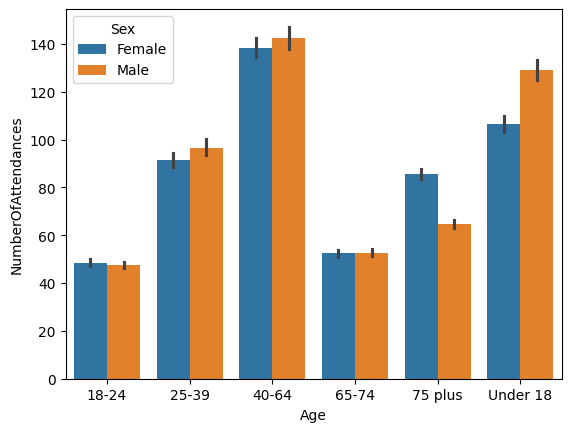

In [14]:
sns.barplot(df_demo, x="Age", y="NumberOfAttendances", hue="Sex")

<Axes: xlabel='Deprivation', ylabel='NumberOfAttendances'>

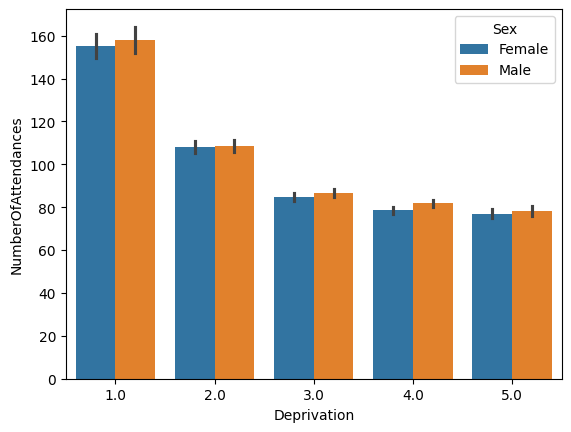

In [15]:
sns.barplot(df_demo, x="Deprivation", y="NumberOfAttendances", hue="Sex")

In [16]:
# Convert the 'WeekEndingDate' column to string
df_demo['Month'] = df_demo['Month'].astype(str)

# Convert the string to datetime, specifying the format
df_demo['Month'] = pd.to_datetime(df_demo['Month'], format='%Y%m')

df_demo.head()

,Month,Country,HBT,DepartmentType,Age,AgeQF,Sex,SexQF,Deprivation,DeprivationQF,NumberOfAttendances
0,2018-01-01,S92000003,S08000015,Emergency Department,18-24,NaN,Female,NaN,1.0,NaN,158
1,2018-01-01,S92000003,S08000015,Emergency Department,18-24,NaN,Female,NaN,2.0,NaN,112
2,2018-01-01,S92000003,S08000015,Emergency Department,18-24,NaN,Female,NaN,3.0,NaN,50
3,2018-01-01,S92000003,S08000015,Emergency Department,18-24,NaN,Female,NaN,4.0,NaN,39
4,2018-01-01,S92000003,S08000015,Emergency Department,18-24,NaN,Female,NaN,5.0,NaN,27


In [17]:
# Convert 'Month' column to datetime and extract the year
df_demo['Year'] = pd.to_datetime(df_demo['Month']).dt.year
df_demo.head()

,Month,Country,HBT,DepartmentType,Age,AgeQF,Sex,SexQF,Deprivation,DeprivationQF,NumberOfAttendances,Year
0,2018-01-01,S92000003,S08000015,Emergency Department,18-24,NaN,Female,NaN,1.0,NaN,158,2018
1,2018-01-01,S92000003,S08000015,Emergency Department,18-24,NaN,Female,NaN,2.0,NaN,112,2018
2,2018-01-01,S92000003,S08000015,Emergency Department,18-24,NaN,Female,NaN,3.0,NaN,50,2018
3,2018-01-01,S92000003,S08000015,Emergency Department,18-24,NaN,Female,NaN,4.0,NaN,39,2018
4,2018-01-01,S92000003,S08000015,Emergency Department,18-24,NaN,Female,NaN,5.0,NaN,27,2018


In [18]:
# Group by year and sum the NumberOfAttendances
Year_attendances = df_demo.groupby('Year')['NumberOfAttendances'].sum().reset_index()

Year_attendances.head()

,Year,NumberOfAttendances
0,2018,1575478
1,2019,1648536
2,2020,1223999
3,2021,1364254
4,2022,1481324


<Axes: xlabel='Year', ylabel='NumberOfAttendances'>

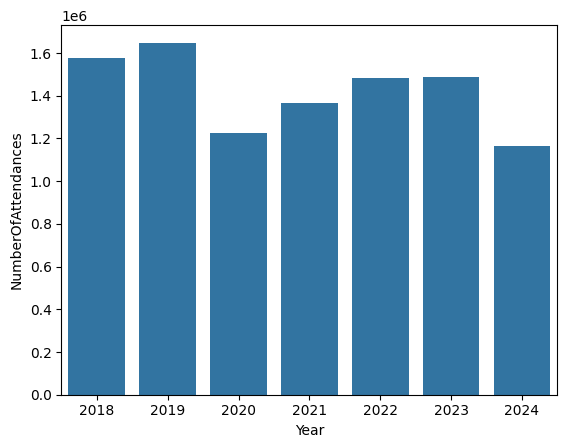

In [19]:
sns.barplot(Year_attendances, x='Year',y='NumberOfAttendances')